In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Se supone que el haz llega paralelo al LEBT. En ese caso, utilizando la aproximación de lentes finas, el foco del haz se va a situar en $f=\frac{V_z}{\omega_L} \cot\frac
{\omega_L L}{V_z}$ donde $\omega_L=\frac{qB}{2m}$, $L$ la longitud del LEBT y $V_z=\sqrt{\frac{2E}{m}}$ la velocidad horizontal, siendo $m$ la masa de la especie, y $E=q\Delta V$ la energia de la particula.

In [2]:
I=np.linspace(1,10,20)
V=5e3

In [3]:
mH=1.67e-27
mH2=2*mH
mH3=3*mH
L=0.15
q=1.60e-19
def B(I):
    return 35e-3*I
def wL(B,m):
    return q*B/2/m
def v(E,m):
    return np.sqrt(2*E/m)
def focus(I,m,V):
    Bo=B(I)
    E=V*q
    return v(E,m)/wL(Bo,m)/np.tan(wL(Bo,m)*L/v(E,m))

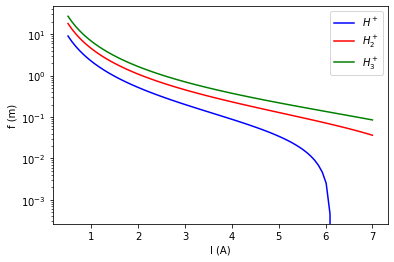

In [4]:
Is=np.linspace(0.5,7,80)
fsH=np.array([])
fsH2=np.array([])
fsH3=np.array([])
for i in Is:
    fsH=np.append(fsH,focus(i,mH,V))
plt.plot(Is,fsH,color='blue',label='$H^+$')
for i in Is:
    fsH2=np.append(fsH2,focus(i,mH2,V))
plt.plot(Is,fsH2,color='red',label='$H_2^+$')
for i in Is:
    fsH3=np.append(fsH3,focus(i,mH3,V))
plt.plot(Is,fsH3,color='green',label='$H_3^+$')
plt.yscale('log')
plt.xlabel('I (A)')
plt.ylabel('f (m)')
plt.legend()

### El grid del Pepperpot esta a unos 10cm de la salida del LEBT

Si el haz entra al LEBT con un radio de 2 cm, llega al grid del Pepperpot con el tamaño r2

In [37]:
def r2(r0,B,E,m,d):
    w=wL(B,m)
    vz=v(E,m)
    r1=r0*np.cos(w*L/vz)
    vr=r1*w*np.tan(w*L/vz)
    return np.abs(r1-vr/vz*d)

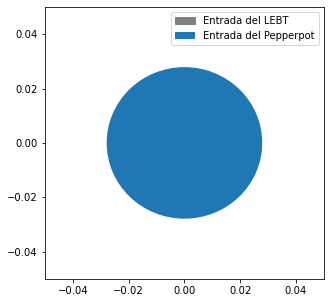

In [49]:
r0=0.02
I=7
rpepp=r2(r0,B(I),5e3*q,mH,0.1)
fig,ax=plt.subplots(1,1,figsize=(5,5))
circle0=patches.Circle((0,0),r0,color='grey',label='Entrada del LEBT')
ax.add_patch(circle0)
circle1=patches.Circle((0,0),rpepp,label='Entrada del Pepperpot')
ax.add_patch(circle1)
plt.xlim([-0.05,0.05])
plt.ylim([-0.05,0.05])
plt.legend()

Grid del Pepperpot

(-30.0, 30.0)

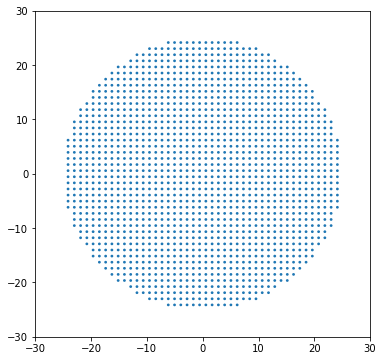

In [57]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
N=50
diam=0.5
Xs=np.linspace(-27.5,27.5,N)
Ys=np.linspace(-27.5,27.5,N)
for x in Xs:
    for y in Ys:
        if (np.sqrt(x**2+y**2)<25):
            circle=patches.Circle((x,y),diam/2)
            ax.add_patch(circle)
plt.xlim([-30,30])
plt.ylim([-30,30])


### De que tamaño son y en que posiciones estan los puntos en la PS?

Si la distancia entre la salida del LEBT y el grid del Pepperpot es d1, y la distancia entre el grid y la PS es d2, entonces: $y_0'=(1-\frac{d2}{f-d1})y_0$, y $\Phi_0'=(1-\frac{d2}{f-d1})\Phi_0$

(-30.0, 30.0)

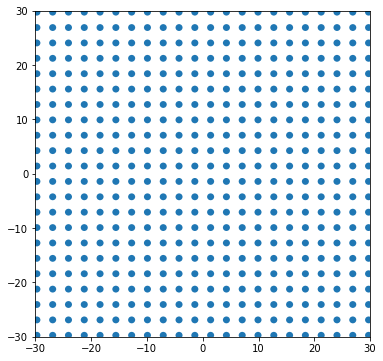

In [5]:
d1=0.075
d2=0.035
I=4.6
f=focus(I,mH,V)
factor=(1-d2/(f-d1))

fig,ax=plt.subplots(1,1,figsize=(6,6))
N=50
diam=0.5
Xs=np.linspace(-27.5,27.5,N)*factor
Ys=np.linspace(-27.5,27.5,N)*factor
for x in Xs:
    for y in Ys:
        if (np.sqrt(x**2+y**2)<25*factor):
            circle=patches.Circle((x,y),diam/2*factor)
            ax.add_patch(circle)
plt.xlim([-30,30])
plt.ylim([-30,30])

Teniendo más de una especie a la vez:

(-30.0, 30.0)

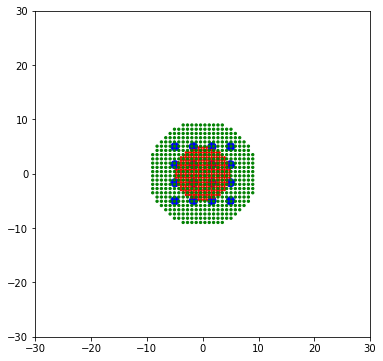

In [104]:
I=4.5
d1=0.075
d2=0.035
r0=0.02

fig,ax=plt.subplots(1,1,figsize=(6,6))
N=50
diam=0.5
m=mH
f=focus(I,m,V)
factor=(1-d2/(f-d1))
Xs=np.linspace(-27.5,27.5,N)
Ys=np.linspace(-27.5,27.5,N)
r=r2(r0,B(I),V*q,m,d1)

for x in Xs:
    for y in Ys:
        if (np.sqrt(x**2+y**2)<25)and(np.sqrt(x**2+y**2)<1000*r):
            circle=patches.Circle((x*factor,y*factor),diam/2*factor,color='blue')
            ax.add_patch(circle)
m=mH2       
f=focus(I,m,V)
factor=(1-d2/(f-d1))
Xs=np.linspace(-27.5,27.5,N)*factor
Ys=np.linspace(-27.5,27.5,N)*factor
r=r2(r0,B(I),V*q,m,d1)
for x in Xs:
    for y in Ys:
        if (np.sqrt(x**2+y**2)<25)and(np.sqrt(x**2+y**2)<1000*r):
            circle=patches.Circle((x*factor,y*factor),diam/2*factor,color='red')
            ax.add_patch(circle)
m=mH3
f=focus(I,m,V)
factor=(1-d2/(f-d1))
Xs=np.linspace(-27.5,27.5,N)*factor
Ys=np.linspace(-27.5,27.5,N)*factor
r=r2(r0,B(I),V*q,m,d1)
for x in Xs:
    for y in Ys:
        if (np.sqrt(x**2+y**2)<25*factor):
            if (np.sqrt(x**2+y**2)<25)and(np.sqrt(x**2+y**2)<1000*r):
                circle=patches.Circle((x*factor,y*factor),diam/2*factor,color='green')
                ax.add_patch(circle)
plt.xlim([-30,30])
plt.ylim([-30,30])

meter el efecto de la luminosidad---> $\alpha\propto$ area del circulo